# Exploratory Data Analysis & Prediction of used car prices

Business Objective: To identify trends in the sales of used cars segment by exploring the dataset and predicting their market value (price) by their respective attributes. For first-time car buyers, COVID-19 has fueled the demand for the sale of used cars. This analysis helps one to understand the trends in the prices of the segment of the used cars and able to identify drivers that determine the car prices and able to predict the car prices to check one's affordability.

Dataset: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

#### Importing necessary libraries required for analysis

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Reading the Data

In [336]:
df=pd.read_csv("Car details v3.csv")

#Displaying the top rows of the dataset
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


#### Description of the data

In [337]:
#Displaying the columns in the dataset
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

Name: Name of the car

Year: Year of the car when it was bought initially

Selling Price: Price at which that car is being sold

KM Driven: Cumulative number of car driven

Fuel: Fuel type of the car

Seller Type: Determination of seller type. Ex: First_owner, Second_owner

Transmission type: Determination of whether the car is automatic or manual

Owner: Determination of the number of previous owners of the cars

Mileage: Mileage condition of the car expressed in kmpl

Engine: Engine capacity of the car expressed in cc

Max Power: Engine Transmission power expressed in bhp

Torque: Engine torque of the car expressed in nm@rpm

Seats: Number of seats in the car

In [338]:
#shape of the dataframe
print(df.shape)
print("Number of rows in the dataframe:", df.shape[0])
print("Number of columns in the dataframe:", df.shape[1])

(8128, 13)
Number of rows in the dataframe: 8128
Number of columns in the dataframe: 13


In [339]:
#Displaying column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [340]:
#Displaying summary of numerical columns
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Here, we can infer that 
> The max year is 2020 and the year value is below 2017 from 75% of the data.

> The maximum selling price is 1 Cr and 75% of the data is below 65 lakhs

> The maximum number of seats is 14, and 75% of the data is up to and below 5 seats.


In [341]:
#Displaying the description of all columns
df.describe(include = 'all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


Inferences:
 > The output consists of the summary of numerical and categorical columns

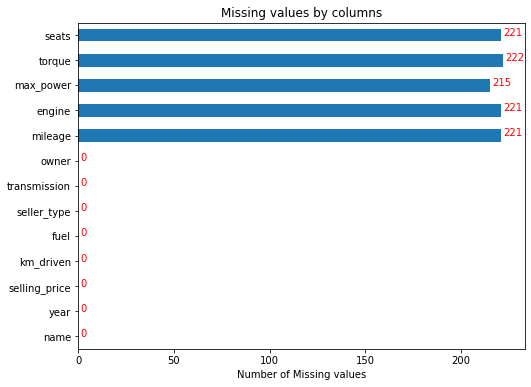

In [342]:
#Displaying the missing values in each column
plt.rcParams["figure.figsize"] = (8,6)
df.isnull().sum().plot.barh()
plt.xlabel('Number of Missing values')
plt.title("Missing values by columns")
for i, v in enumerate(df.isnull().sum()):
    plt.text(v +1, i , str(v), color='red')

Inferences:
> The output displays the number of missing values in each column. Seats, torque, max_power, engine & mileage columns consists of 221 missing values

In [343]:
#cleaning of columns and chaning to appropriate data types
df1=df.copy(deep=True)
df1['seats'] = df1['seats'].fillna(0)
df1['name']=df1['name'].str.split(' ').str[0]
df1['fuel']=df1['fuel'].astype('category')
df1['seller_type']=df1['seller_type'].astype('category')
df1['transmission']=df1['transmission'].astype('category')
df1['owner']=df1['owner'].astype('category')
df1['name']=df1['name'].astype('category')
df1['seats']=df1['seats'].astype('int')
df1['mileage']=df1['mileage'].str.replace('kmpl', '')
df1['mileage']=df1['mileage'].str.replace('km/kg', '')
df1['mileage']=df1['mileage'].astype('float')
df1['engine']=df1['engine'].str.replace('CC', '')
df1['engine']=df1['engine'].str.replace('CC', '')

In [344]:
df1.dtypes

name             category
year                int64
selling_price       int64
km_driven           int64
fuel             category
seller_type      category
transmission     category
owner            category
mileage           float64
engine             object
max_power          object
torque             object
seats               int32
dtype: object

### Cleaning the dataframe

In [345]:
#Removing null values and displaying the results after cleaning
df1 =df1.dropna()
df1.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [346]:
#Number of unique values in each column
df1.nunique()

name              31
year              27
selling_price    670
km_driven        898
fuel               4
seller_type        3
transmission       2
owner              5
mileage          381
engine           121
max_power        320
torque           441
seats              9
dtype: int64

Inferences:
> The data is profiled, columns are cleansed, and the columns are coded to appropriate data types so that we can use them for our further analysis

##### Analyzing data distribution in numerical columns 

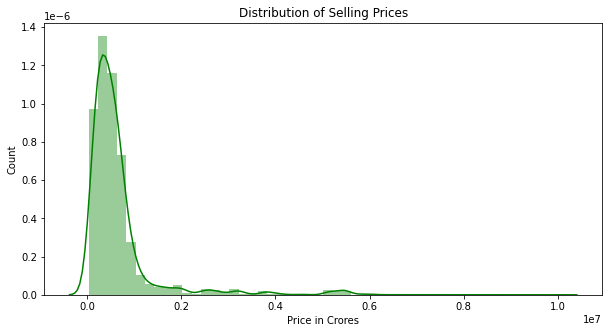

In [347]:
#Distribution of selling prices
plt.figure(figsize=(10,5))
(sns.distplot(df1['selling_price'],bins=50,kde=True,color = "green")).set(xlabel="Price in Crores", ylabel = "Count", title='Distribution of Selling Prices')
plt.show()


Inferences:
> We can see that the selling prices are distributed as displayed in the output. Most of the selling prices fall in between 0 to 1500000
    

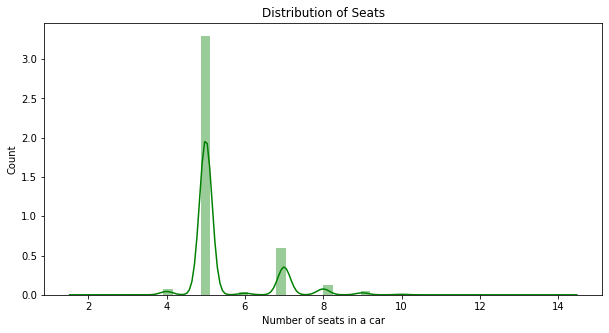

In [348]:
#Distribution of Seats
plt.figure(figsize=(10,5))
(sns.distplot(df1['seats'],bins=50,kde=True,color = "green")).set(xlabel="Number of seats in a car", ylabel = "Count", title='Distribution of Seats')
plt.show()


Inferences:
> We can see that the most number of seats fall in between 4 and 6.

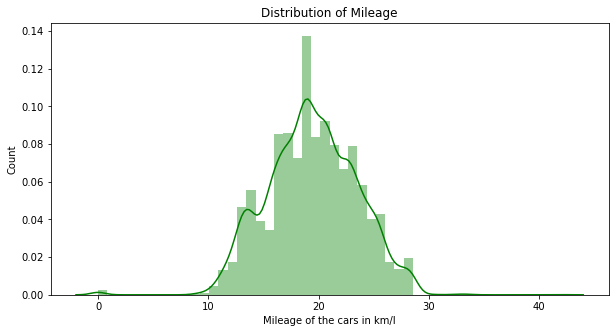

In [349]:
#Distribution of Mileage conditions of cars
plt.figure(figsize=(10,5))
(sns.distplot(df1['mileage'],bins=50,kde=True,color = "green")).set(xlabel="Mileage of the cars in km/l", ylabel = "Count", title='Distribution of Mileage')
plt.show()

Inferences:
> We can see that most of the cars mileages fall in between 15 and 25 km/l

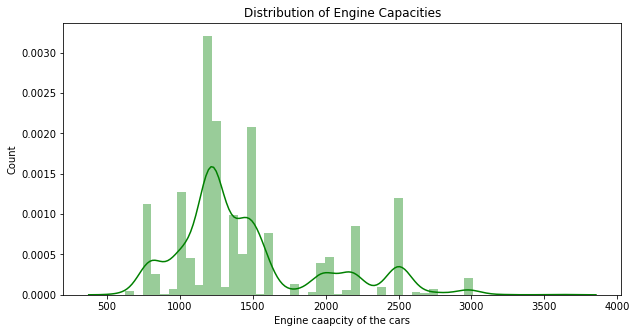

In [350]:
#Distribution of Engine capacity of the cars
plt.figure(figsize=(10,5))
(sns.distplot(df1['engine'],bins=50,kde=True,color = "green")).set(xlabel="Engine caapcity of the cars", ylabel = "Count", title='Distribution of Engine Capacities')
plt.show()

Inferences:
> We can observe that the most of engine capacities falls in between 1000 and 1500 cc

In [351]:
#5 number summary of Numerical Columns
df1.describe(percentiles=[0.25,0.50,0.75,0.85,0.95])

,year,selling_price,km_driven,mileage,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,19.419861,5.416393
std,3.863695,8.135827e+05,5.679230e+04,4.036263,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,22.320000,5.000000
85%,2018.000000,8.500000e+05,1.165500e+05,23.840000,7.000000
95%,2019.000000,2.000000e+06,1.500000e+05,25.830000,7.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,14.000000


Inferences:
> The output displays the numerical summary of the numerical columns. The mean, standard deviation, minimum value, maximum value, and percentile ranges of the columns are displayed.

#### Numerical and Categorical columns analysis

Text(0.5, 1.0, 'Visualization of the cars that was initially bought')

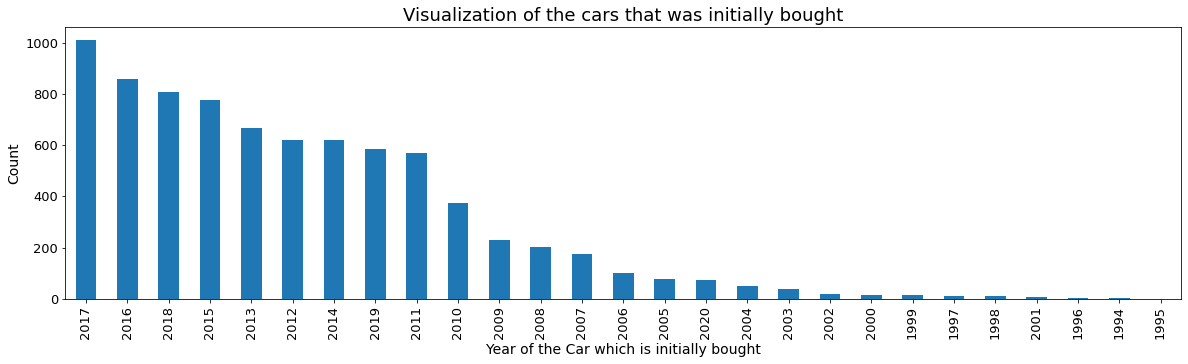

In [352]:
#displaying the count of cars by their initial bought year
df1['year'].value_counts().plot(x="year",figsize=(20, 5),kind='bar',fontsize=13)
plt.xlabel('Year of the Car which is initially bought', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Visualization of the cars that was initially bought',fontsize=18)

Inferences:
> The output displays the value counts of the cars that are being bought initially in a respective year 

Text(0.5, 1.0, 'Visualization of the cars its manufacturing comapny')

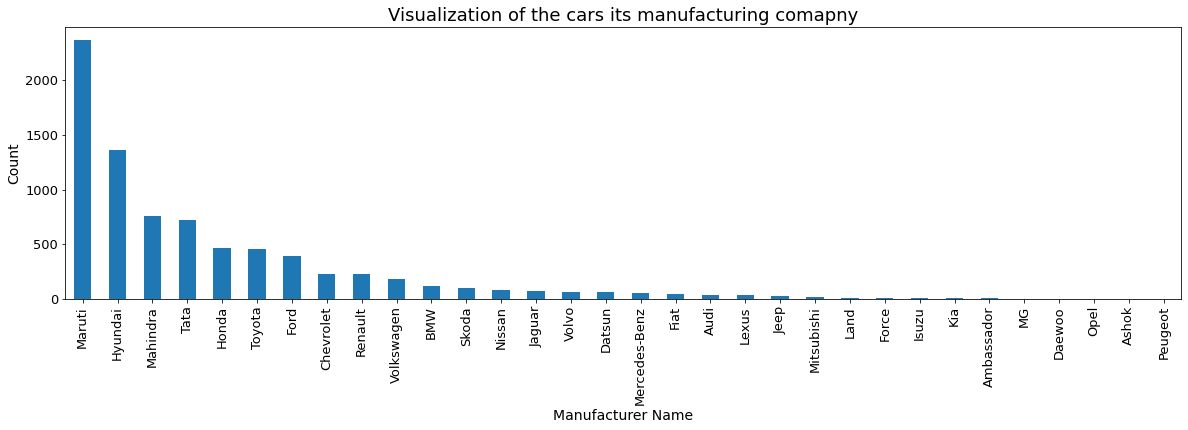

In [353]:
#displaying the count of cars sold by their manufacturing companies
df1['name'].value_counts().plot(x="year",figsize=(20, 5),kind='bar',fontsize=13)
plt.xlabel('Manufacturer Name', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Visualization of the cars its manufacturing comapny',fontsize=18)

Inferences:
> The output displays the value counts of the cars that belong to respective car manufacturers.

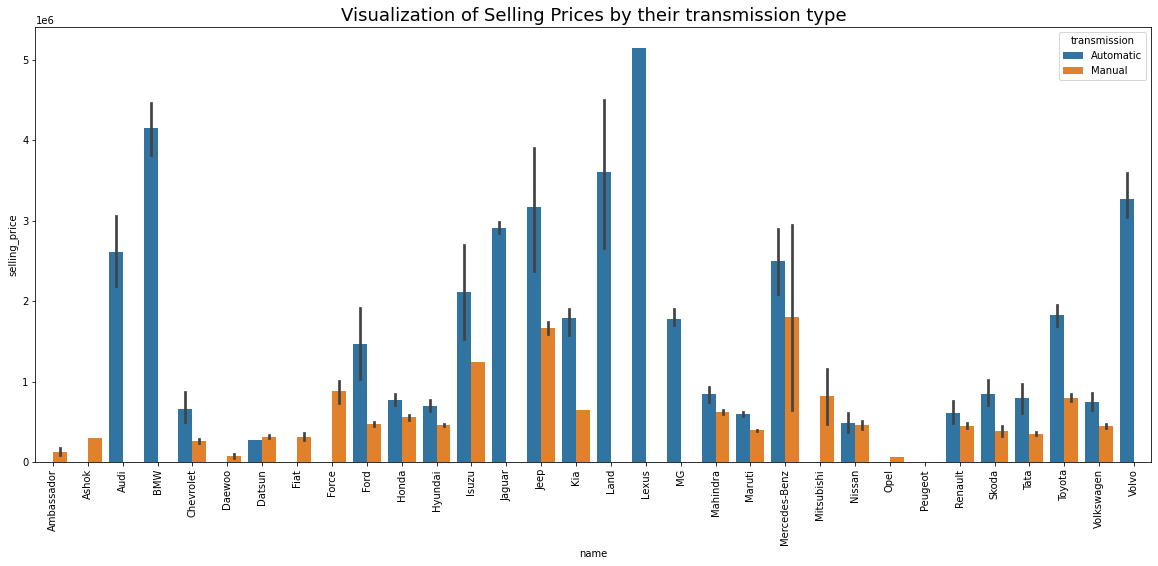

In [354]:
#displaying the comparision of selling prices by their makers and transmission type 
plt.figure(figsize=(20,8))
sns.barplot('name','selling_price',hue='transmission',data=df1)
plt.title('Visualization of Selling Prices by their transmission type', fontsize = 18)
plt.xticks(rotation =90)
plt.show()

Inferences:
> The output displays the comparison of the transmission types by the selling prices and their car manufacturers. Lexus has the most automatic vehicle segment and Fiat, Ambassador has only the manual transmission types of the cars that are sold.

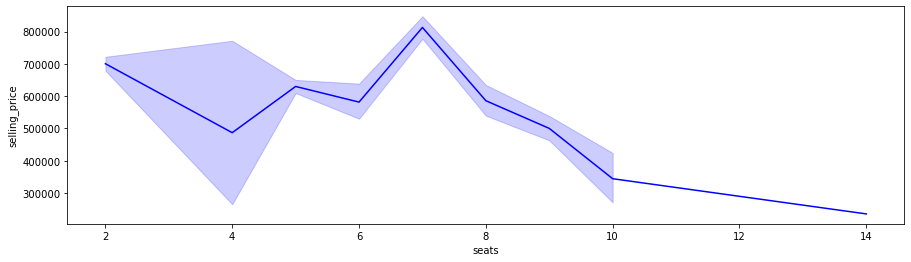

In [355]:
#visualization of selling price by seats capacity
plt.figure(figsize=(15,4))
sns.lineplot(x='seats',y='selling_price', data =df1, color = 'b')
plt.show()

Inferences:
> The output displays the trends of selling prices concerning the seating capacity of the cars. The cars with the highest number of seats have the lower selling price.

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

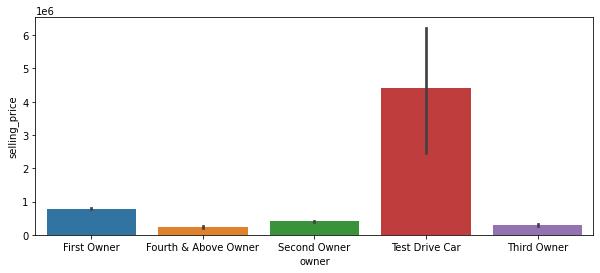

In [356]:
#comparing the selling prices by their owner type
plt.figure(figsize=(10,4))
sns.barplot(df1['owner'],df1['selling_price'])

Inferences:
> The output displays the selling price variation of the owner type. The test drive cars have the highest selling prices.

Text(0.5, 1.0, 'Selling Prices by fuel type')

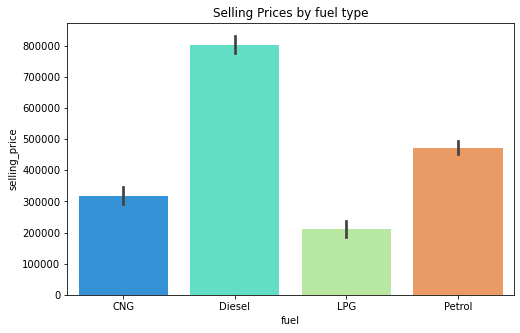

In [357]:
#comaprision of selling_prices by the vehicle fuel type
plt.figure(figsize=(8,5))
sns.barplot(x='fuel',y='selling_price',data=df1, palette='rainbow')
plt.title("Selling Prices by fuel type")

Inferences:
> The visualization of comparison of cars by fuel type and its selling prices. The diesel variant cars have the most selling prices

<Figure size 432x432 with 0 Axes>

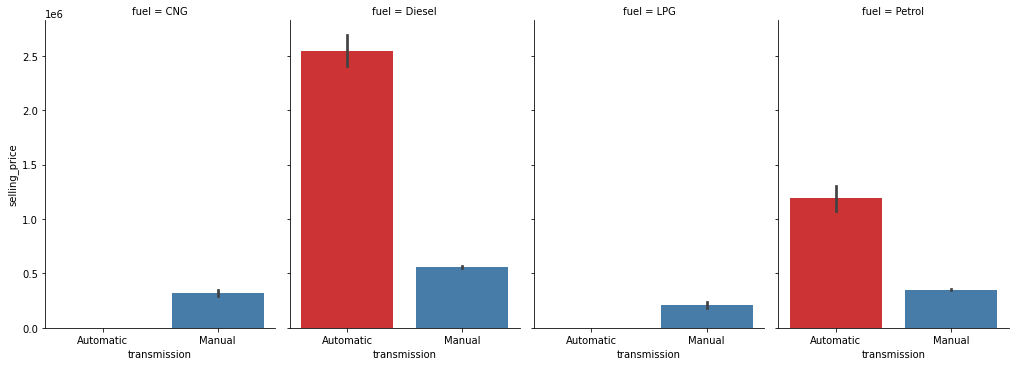

In [358]:
#Displaying the selling prices by their fuel type and transmission type  
plt.figure(figsize=(6,6))
sns.catplot(x='transmission',y='selling_price', col = 'fuel', data=df1,
                kind='bar', aspect=.7, palette='Set1')


Inferences:
> Comparison of the selling prices by their selling prices and fuel type. The automatic variant of diesel fuel type has the most selling prices

Text(0, 0.5, 'Selling Prices')

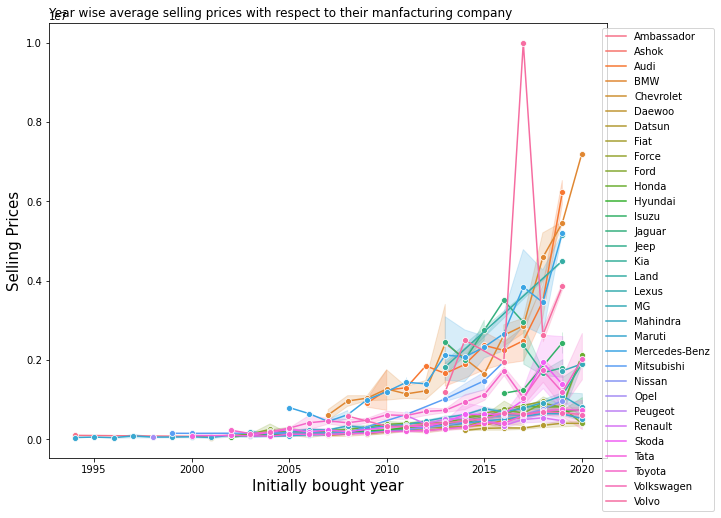

In [359]:
#Displaying the selling price trends of various car maker companies over the years
plt.figure(figsize=(10,8))
plot = sns.lineplot(x='year', y='selling_price', hue="name",marker='o', data=df1)
plot.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title("Year wise average selling prices with respect to their manfacturing company", loc='left')
plt.xlabel("Initially bought year", size=15)
plt.ylabel("Selling Prices", size=15)

Inferences:
> The price trends of the cars over the years by their maker company. The Volvo car of 2017 model has the highest price and the prices of all the other cars have risen significantly over the years.

#### Creating No_of_years column to capture the how old the car is. 

In [360]:
import datetime
year=datetime.date.today().year
df1['No_of_Years']=year-df1['year']

In [361]:
#correlation matrix of numerical columns
df1[['No_of_Years','selling_price','km_driven','seats','mileage']].corr()

,No_of_Years,selling_price,km_driven,seats,mileage
No_of_Years,1.000000,-0.412302,0.428548,0.007923,-0.328544
selling_price,-0.412302,1.000000,-0.222158,0.041617,-0.126280
km_driven,0.428548,-0.222158,1.000000,0.227259,-0.172980
seats,0.007923,0.041617,0.227259,1.000000,-0.451700
mileage,-0.328544,-0.126280,-0.172980,-0.451700,1.000000


Inferences:
> The output displays the correlation matrix of numerical columns. The columns of selling prices and year are highly correlated.

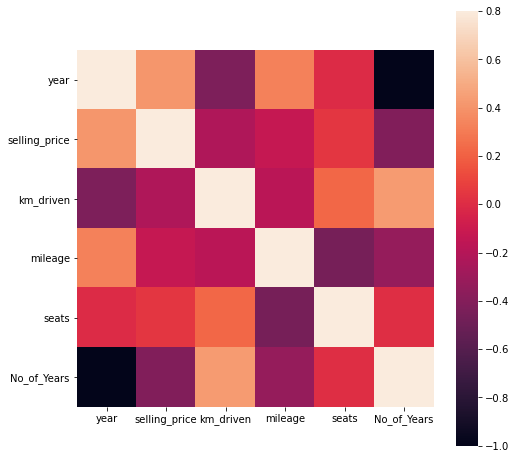

In [362]:
#visualization of correlation matrix
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

Inferences:
> The output displays the visualization of the correlation matrix. The lighter the color, the highest the correlation between two columns.

In [363]:
#Creating a dataframe with the highest coorelated columns identified by the coorelation matri

df2=df1[['No_of_Years','selling_price','km_driven','seats','mileage']]

In [364]:
#Displaying the drivers
df2.head()

,No_of_Years,selling_price,km_driven,seats,mileage
0,7,450000,145500,5,23.40
1,7,370000,120000,5,21.14
2,15,158000,140000,5,17.70
3,11,225000,127000,5,23.00
4,14,130000,120000,5,16.10


### OLS Regression using statsmodel on full dataset

In [365]:
#OLS Model without a constant
import statsmodels.api as sm

x = [x for x in df2.columns if x != 'selling_price']
X=df2[x]
y= df2['selling_price']

oLsModel = sm.OLS(y, X).fit()
print(oLsModel.summary())

                                 OLS Regression Results                                
Dep. Variable:          selling_price   R-squared (uncentered):                   0.472
Model:                            OLS   Adj. R-squared (uncentered):              0.472
Method:                 Least Squares   F-statistic:                              1766.
Date:                Mon, 11 Oct 2021   Prob (F-statistic):                        0.00
Time:                        21:30:55   Log-Likelihood:                     -1.1824e+05
No. Observations:                7906   AIC:                                  2.365e+05
Df Residuals:                    7902   BIC:                                  2.365e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Observations:

> Overall $R^2$ is about 0.47. SO, the model is capturing 47% of the variance in selling prices of cars

> No_of_Years, km_driven, mileage columns are statistically significant. As the p-value for mileage is greater than 0.05 it could be considered as not statically significant

> Number of seats in a car seems to be the important factor determining the selling price of the car since the t-statistic value for seats is higher.

In [366]:
#OLS Model with a constant


X = sm.add_constant(X) 

olsModel = sm.OLS(y, X).fit()
predictions = olsModel.predict(X)

print(olsModel.summary())


                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     686.3
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:30:56   Log-Likelihood:            -1.1763e+05
No. Observations:                7906   AIC:                         2.353e+05
Df Residuals:                    7901   BIC:                         2.353e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.259e+06   9.01e+04     36.151      

Oservations:
    
> $R^2$ value is lower when added a constant. It's because the regression line doesn't pass through the origin, which would cause the model doesn't capture the variance in selling price as compared to the model without a constant.

#### Checking Residuals

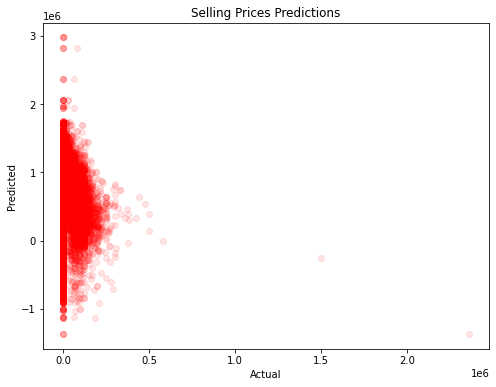

In [367]:
plt.plot(X, predictions, 'ro', alpha=0.1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Selling Prices Predictions')
plt.show()

Inferences:

> The residulas are concentrated near 0 

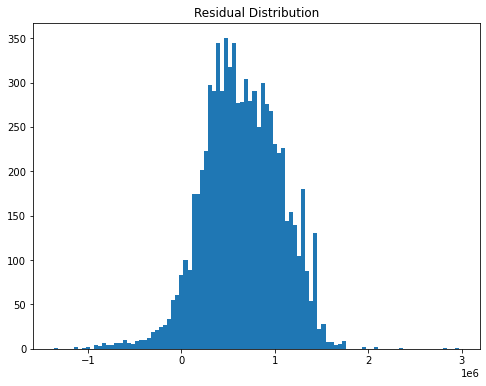

In [368]:
plt.hist(predictions, bins=100)
plt.title('Residual Distribution')
plt.show()

> The residuals looks like a near noramal distribution

### Inferences from OLS Regression model

1) All the features in the model are significant and the model explains 47% of the variation in selling prices.

2)  The mileage feature is counter-intuitive. This could be explained when all the other columns are taken into consideration. The column mileage has some interdependency between other columns such as model, transmission, etc.

3) There are issues of multicollinearity as the features are independent among other independent features

4) We can see some skewness in residual distribution and it isn't fully normal distributed as the skew value is approx. 4.

5) The residuals are concentrated close to 0 (from the residual distribution graph) and the Kurtosis value is around 25, implies that the outliers from the data must be removed.

### Prediction of selling price

###### Splitting the data into train and test data

In [369]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2[x], df2['selling_price'], test_size=0.25, random_state = 50)

In [370]:
print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')


Training samples: 5,929
Test samples: 1,977


###### Scaling the data.

Since we have all the numerical values with no missing values, we need to scale the data in order to normalize the data such that the range of all the columns are almost similar

In [371]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)

scaler = StandardScaler().fit(X_test)
X_test_scaled=scaler.transform(X_test)

###### Aplying the Linear Regression model

In [372]:
from sklearn.linear_model import LinearRegression


lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

print("R-Square vaule for train data is:", rr.score(X_train,y_train))
print("R-Square vaule for test data is:", rr.score(X_test,y_test))
print("The coefficients are:", lr.coef_)

R-Square vaule for train data is: 0.26323929653458533
R-Square vaule for test data is: 0.23692030517015195
The coefficients are: [-1.05175046e+05 -8.97223441e-01 -7.95129779e+04 -6.90005407e+04]


In [373]:
#Running Ridge regression at alpha = 0 i.e., OLS model
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0)
rr.fit(X_train,y_train)

print("R-Square vaule at alpha = 0 for train data is:", rr.score(X_train,y_train))
print("R-Square vaule at alpha = 0 for test data is:", rr.score(X_test,y_test))
print("The coefficients are:", rr.coef_)

R-Square vaule at alpha = 0 for train data is: 0.26367758427705923
R-Square vaule at alpha = 0 for test data is: 0.23897000339841046
The coefficients are: [-1.05175046e+05 -8.97223441e-01 -7.95129779e+04 -6.90005407e+04]


In [374]:
#Running Ridge regression at alpha = 0.1

rr = Ridge(alpha=0.1)
rr.fit(X_train,y_train)

print("R-Square vaule at alpha = 0.1 for train data is:", rr.score(X_train,y_train))
print("R-Square vaule at alpha = 0.1 for test data is:", rr.score(X_test,y_test))
print("The coefficients are:", rr.coef_)

R-Square vaule at alpha = 0.1 for train data is: 0.26367758427034427
R-Square vaule at alpha = 0.1 for test data is: 0.23896981698378628
The coefficients are: [-1.05174680e+05 -8.97242099e-01 -7.95104933e+04 -6.90001405e+04]


In [375]:
#Running Ridge regression at alpha = 0.9

rr = Ridge(alpha=0.9)
rr.fit(X_train,y_train)

print("R-Square vaule at alpha = 0.9 for train data is:", rr.score(X_train,y_train))
print("R-Square vaule at alpha = 0.9 for test data is:", rr.score(X_test,y_test))
print("The coefficients are:", rr.coef_)

R-Square vaule at alpha = 0.9 for train data is: 0.2636775837333626
R-Square vaule at alpha = 0.9 for test data is: 0.23896832539913104
The coefficients are: [-1.05171751e+05 -8.97391335e-01 -7.94906208e+04 -6.89969394e+04]


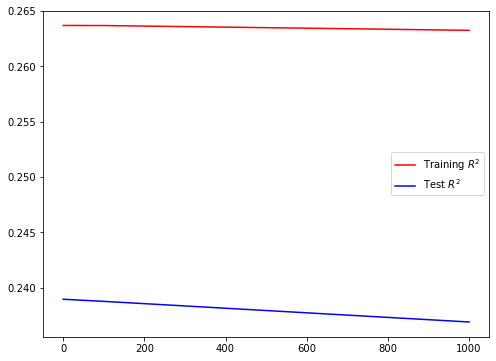

In [376]:
alphas = [0.01, 0.1, 0.9,1, 10, 100, 1000]

training_scores = []
test_scores = []

for i in alphas:
    rr = Ridge(alpha=i)
    rr.fit(X_train,y_train)
    training_scores.append(rr.score(X_train,y_train))
    test_scores.append(rr.score(X_test, y_test))
    
plt.plot(alphas, training_scores, 'r-')
plt.plot(alphas, test_scores, 'b-')
plt.legend(['Training $R^2$', 'Test $R^2$'])
plt.show()

Inferences:

> Since the $R^2$ value for training and test data are closer i.e., there is no problem of overfitting. If the $R^2$ values differ in large, then there would be the overfitting problem.

> As the variation in alpha doesn't affect the resuls much, it would be preferrable to use simple OLS model to predict the selling price

#### Comparing Coefficients of OLS model and Ridge Regression Model

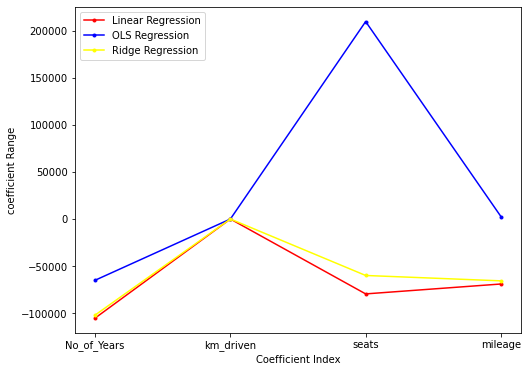

In [377]:
plt.plot(lr.coef_,marker='.',color='red',label=r'Linear Regression')
plt.plot(oLsModel.params,marker='.',color='blue',label=r'OLS Regression')
plt.plot(rr.coef_,marker='.',color='yellow',label=r'Ridge Regression')
plt.xlabel('Coefficient Index')
plt.ylabel('coefficient Range')
plt.legend()
plt.show()

Inferences:
1) The OLS model has high coefficients, and it infers that the small variation in the coefficients results in larger variation in Selling price

2) In OLS model seating capacity has the higher value whereas, in linear regression and ridge regression kilometers driven has more significance

### Sample prediction of selling price using OLS model

In [378]:
oLsModel.predict([11,20000,4,20])

array([145463.74860377])

Inference:

> The car manufactured in 2010 having 4 seating capacity and 20 kms/l as mileage with 20000 km driven costs around 145460.

### Observations from exploratory analysis:

1) Most of the car prices are in the range of 300000 to 1500000

2) Most of the cars sold are 5-seaters

3) Most of the cars sold has mileage in the range of 18-22 km/liter

4) Most of the cars sold has an engine capacity of 1200 to 1300 cc

5) The cars bought during 2017 & 2016 are sold mostly

6) The cars that are manufactured by Maruti, Hyundai, & Mahindra are sold the most

7) Lexus, BMW, Volvo have the most automatic cars sold rather than manual cars. Force & Fiat has the most manual cars sold than the automatic ones.

8) The columns year & mileage, and year & kilometers driven has the highest correlation.

9) Test drive cars and first owners cars the highest sold cars

10) Diesel and petrol variant cars are the most sold cars.

11) The Volvo car manufactured in 2017 has the highest selling price, and the prices of the cars have increased significantly over the years.

### Observations from Regression models:

1) In our Regression model, we could explain about 47% of the variation in selling prices.

2) A simple OLS regression model is appropriate for our model rather than a model with increasing or decreasing the regularization strengths.

3) Number of miles/kilometers driven and seating capacity are the primary factors influencing the selling prices of the cars.

4) Since there are interdependent features, we should handle the issue of multicollinearity.

5) As we could explain only 47% of the variance in selling prices, we need to consider other features to improve the model performance.

References: 

1) https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec

2) https://medium.com/analytics-vidhya/its-all-about-regression-part-1-c002fcaa8a55